# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | bukama
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | chimbote
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | pariaman
Processing Record 9 of Set 1 | kailua-kona
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | popondetta
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | thal
Processing Record 14 of Set 1 | norilsk
Processing Record 15 of Set 1 | phan rang-thap cham
Processing Record 16 of Set 1 | pacocha
Processing Record 17 of Set 1 | dakhla
Processing Record 18 of Set 1 | remire-montjoly
Processing Record 19 of Set 1 | tolanaro
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | haiku-pauwela
Processing R

Processing Record 38 of Set 4 | constantia
Processing Record 39 of Set 4 | devarkonda
Processing Record 40 of Set 4 | vorozhba
Processing Record 41 of Set 4 | madalena
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | enriquillo
Processing Record 45 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | caleta de carquin
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | tashtyp
Processing Record 0 of Set 5 | shalya
Processing Record 1 of Set 5 | sipocot
Processing Record 2 of Set 5 | bullhead city
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | alotau
Processing Record 5 of Set 5 | midvagur
Processing Record 6 of Set 5 | axim
Processing Record 7 of Set 5 | santo antonio
Processing Record 8 of Set 5 | nyurba
Processing Record 9 of Set 5 | noumea
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | x

Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | pyin oo lwin
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | kapuskasing
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | stargard
Processing Record 37 of Set 8 | kanbe
Processing Record 38 of Set 8 | inarajan village
Processing Record 39 of Set 8 | faulquemont
Processing Record 40 of Set 8 | dire dawa
Processing Record 41 of Set 8 | ploudalmezeau
Processing Record 42 of Set 8 | carrizal
Processing Record 43 of Set 8 | gadzhiyevo
Processing Record 44 of Set 8 | calbuco
Processing Record 45 of Set 8 | codrington
Processing Record 46 of Set 8 | ca mau
Processing Record 47 of Set 8 | coatetelco
Processing Record 48 of Set 8 | vila franca do campo
Processing Record 49 of Set 8 | tura
Processing Record 0 of Set 9 | yuzhno-kurilsk
Processing Record 1 of Set 9 | diapaga
Processing Record 2 of Set 9 | port saint john's
Processing Record 3 of Set 9 | irymple
Processing Record 

Processing Record 19 of Set 12 | palikir - national government center
Processing Record 20 of Set 12 | manggar
Processing Record 21 of Set 12 | sarakhs
Processing Record 22 of Set 12 | polyarnyy
Processing Record 23 of Set 12 | bonthe
Processing Record 24 of Set 12 | inirida
Processing Record 25 of Set 12 | kalmunai
Processing Record 26 of Set 12 | adam
Processing Record 27 of Set 12 | carrollton
Processing Record 28 of Set 12 | quimili
Processing Record 29 of Set 12 | sainte-catherine
Processing Record 30 of Set 12 | miguel ahumada
Processing Record 31 of Set 12 | riverton
Processing Record 32 of Set 12 | aioun
Processing Record 33 of Set 12 | alofi
Processing Record 34 of Set 12 | usinsk
Processing Record 35 of Set 12 | new shagunnu
Processing Record 36 of Set 12 | los rastrojos
Processing Record 37 of Set 12 | ibanda
Processing Record 38 of Set 12 | porto novo
Processing Record 39 of Set 12 | kyaikkami
-----------------------------
Data Retrieval Complete      
---------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-25.0660,19.63,60,84,4.49,PN,1726355626
1,arraial do cabo,-22.9661,-22.9661,23.36,83,0,12.57,BR,1726355578
2,karratha,-20.7377,-20.7377,27.82,33,88,8.48,AU,1726355628
3,bukama,-9.2000,-9.2000,24.92,28,13,1.00,CD,1726355630
4,papatowai,-46.5619,-46.5619,6.44,97,100,3.75,NZ,1726355631


In [6]:
# before outputing the day converting time to a readable format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-25.0660,19.63,60,84,4.49,PN,2024-09-14
1,arraial do cabo,-22.9661,-22.9661,23.36,83,0,12.57,BR,2024-09-14
2,karratha,-20.7377,-20.7377,27.82,33,88,8.48,AU,2024-09-14
3,bukama,-9.2000,-9.2000,24.92,28,13,1.00,CD,2024-09-14
4,papatowai,-46.5619,-46.5619,6.44,97,100,3.75,NZ,2024-09-14


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

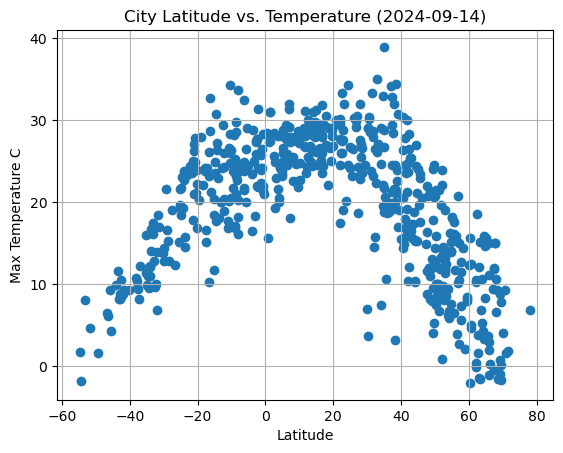

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

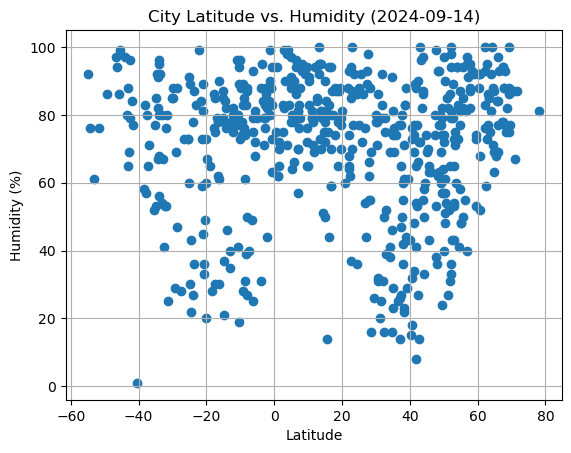

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

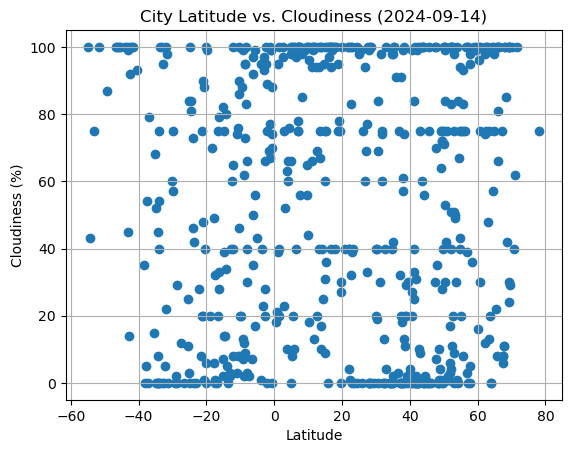

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

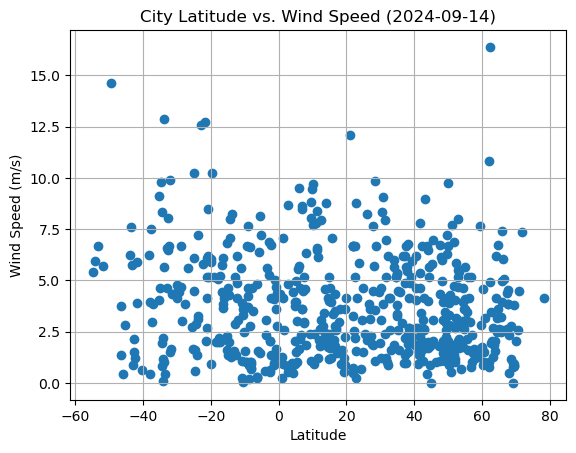

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,kailua-kona,19.6406,19.6406,29.04,79,30,2.24,US,2024-09-14
12,thal,35.4791,35.4791,10.62,76,100,1.61,PK,2024-09-14
13,norilsk,69.3535,69.3535,0.71,75,24,0.84,RU,2024-09-14
14,phan rang-thap cham,11.5667,11.5667,26.67,71,100,1.22,VN,2024-09-14
16,dakhla,23.6848,23.6848,20.09,92,0,5.86,EH,2024-09-14


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-25.0660,19.63,60,84,4.49,PN,2024-09-14
1,arraial do cabo,-22.9661,-22.9661,23.36,83,0,12.57,BR,2024-09-14
2,karratha,-20.7377,-20.7377,27.82,33,88,8.48,AU,2024-09-14
3,bukama,-9.2000,-9.2000,24.92,28,13,1.00,CD,2024-09-14
4,papatowai,-46.5619,-46.5619,6.44,97,100,3.75,NZ,2024-09-14


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7632860077489715


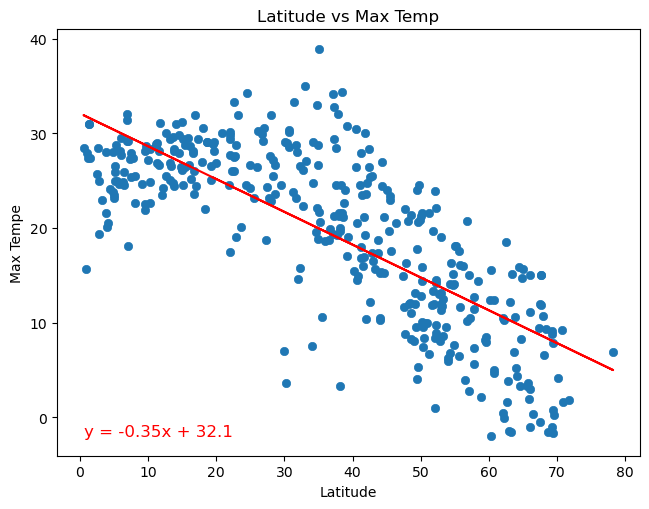

In [34]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")
plt.title(f"Latitude vs Max Temp")
plt.show()

The r-value is: 0.8111917144088081


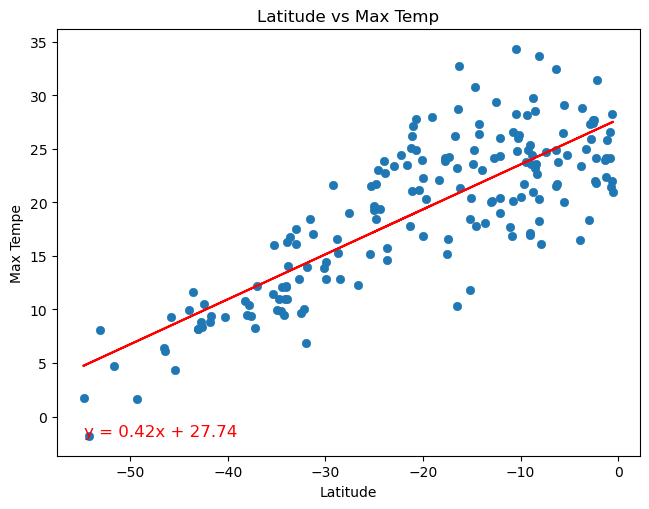

In [35]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")
plt.title(f"Latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05254555197422095


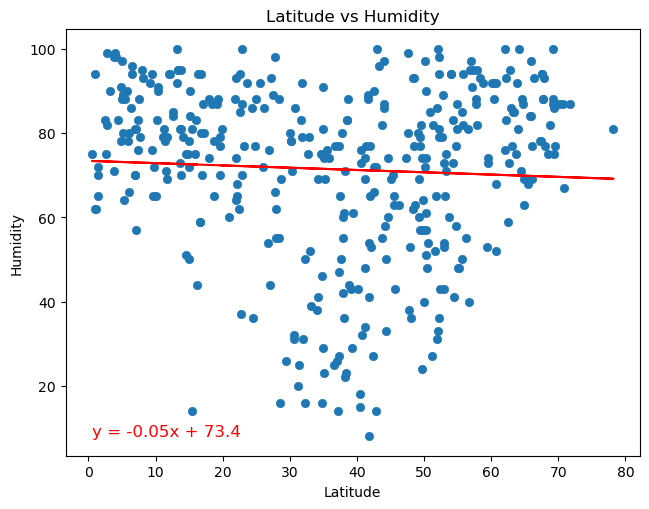

In [25]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity")
plt.show()

The r-value is: -0.01480007460604158


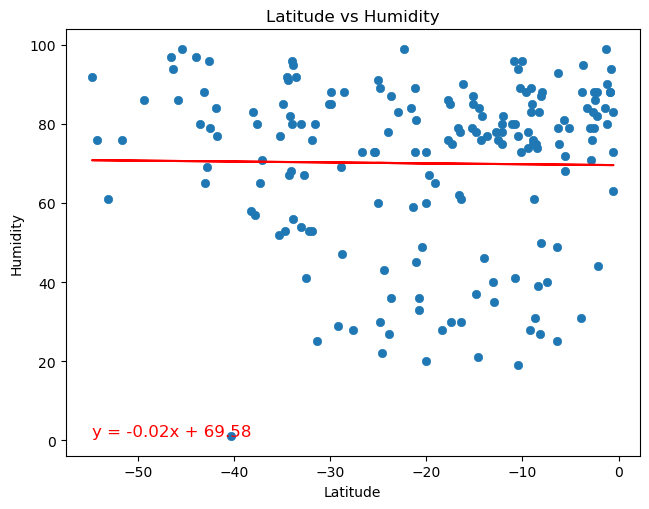

In [26]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10477114895337461


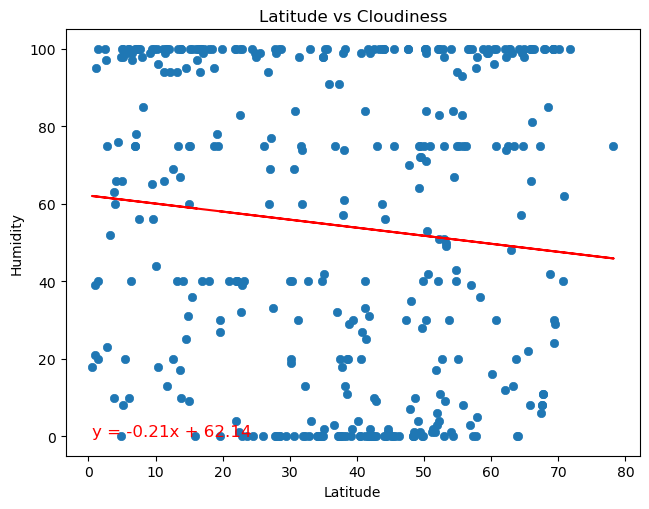

In [27]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Cloudiness")
plt.show()

The r-value is: -0.05691267456961036


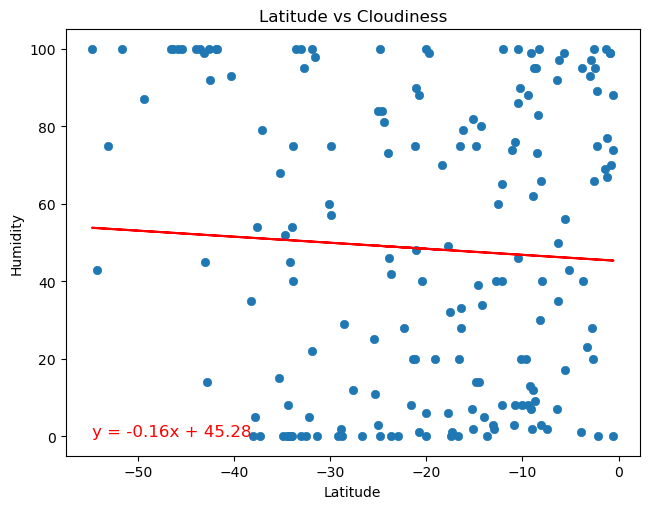

In [28]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0805462018522835


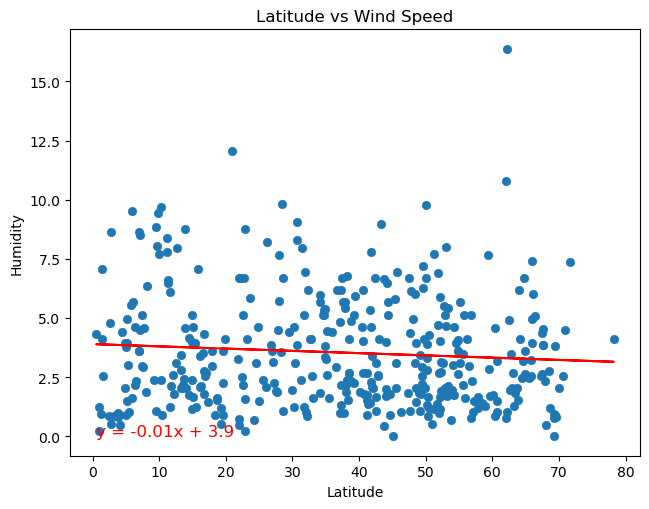

In [29]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Wind Speed")
plt.show()

The r-value is: -0.22674164617485698


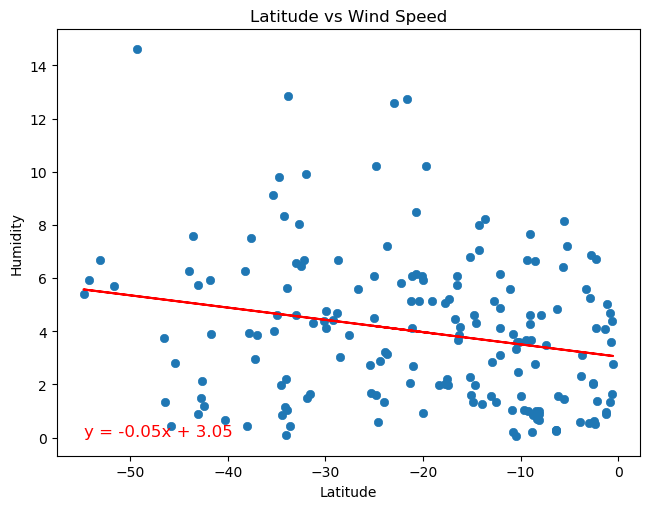

In [30]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE